In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
loanData = pd.read_csv("loan_data.csv")

In [4]:
loanData.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loanData.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

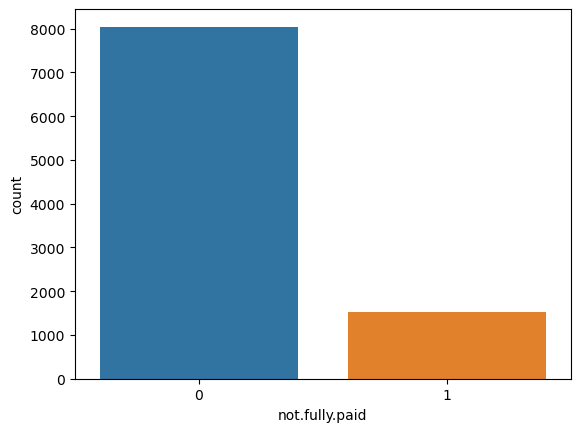

In [7]:
sns.countplot(x="not.fully.paid", data=loanData)

In [8]:
loanData["credit.policy"].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [10]:
loanData["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [16]:
g = loanData.groupby("purpose")
g.first()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
purpose,,,,,,,,,,,,,
all_other,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
credit_card,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
debt_consolidation,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
educational,1,0.0775,168.60,8.987197,3.00,762,6659.958333,1321,16.5,0,0,0,0
home_improvement,1,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
major_purchase,1,0.1103,327.53,10.738915,13.04,702,8159.958333,5394,53.4,1,0,0,0
small_business,1,0.0714,92.82,11.512925,6.50,747,4384.000000,3021,4.8,0,1,0,0


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

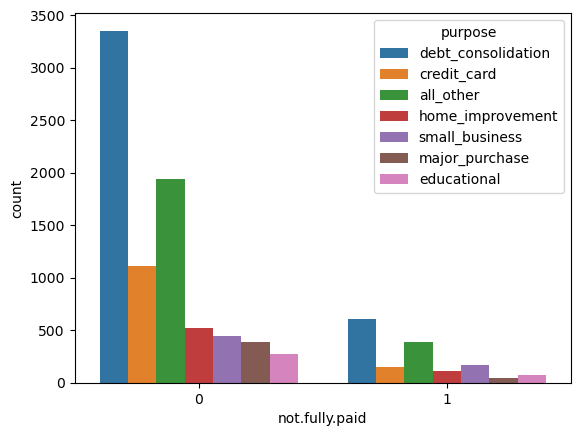

In [17]:
sns.countplot(x="not.fully.paid", data=loanData, hue="purpose")

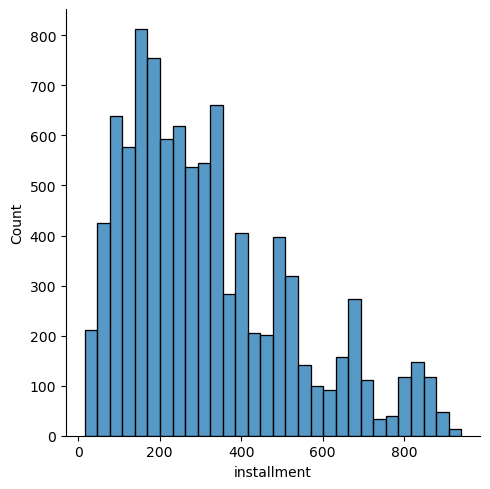

In [19]:
sns.displot(x="installment", data=loanData, bins=30)

In [20]:
loanData.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [22]:
loanData["credit.policy"].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

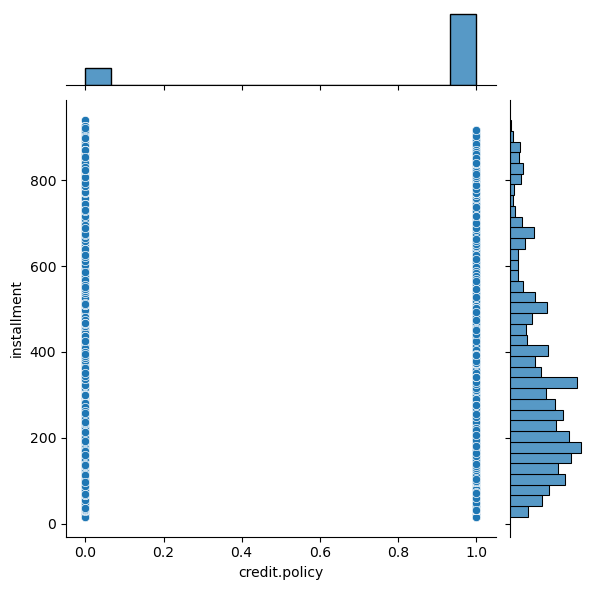

In [25]:
sns.jointplot(x="credit.policy", y="installment", data=loanData)

In [26]:
final_data = pd.get_dummies(loanData, columns=["purpose"], drop_first=True)

In [27]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = final_data.drop("not.fully.paid", axis=1)
y = final_data["not.fully.paid"]

In [30]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
decision = DecisionTreeClassifier()

In [33]:
decision.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
predictions = decision.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(confusion_matrix(predictions, y_test))

[[2174  388]
 [ 492  107]]


In [37]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2562
           1       0.22      0.18      0.20       599

    accuracy                           0.72      3161
   macro avg       0.52      0.51      0.51      3161
weighted avg       0.70      0.72      0.71      3161



In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
randomForest = RandomForestClassifier(n_estimators=600)

In [41]:
randomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [42]:
randomPredictions = randomForest.predict(X_test)

In [43]:
print(confusion_matrix(randomPredictions, y_test))

[[2657  485]
 [   9   10]]


In [44]:
print(classification_report(randomPredictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.91      3142
           1       0.02      0.53      0.04        19

    accuracy                           0.84      3161
   macro avg       0.51      0.69      0.48      3161
weighted avg       0.99      0.84      0.91      3161

